# multiscale-galactose example

In [4]:
from __future__ import print_function, division

%matplotlib inline
import roadrunner
print(roadrunner.__version__)

import multiscale.odesim.simulate.roadrunner_tools as rt

1.4.2; Compiler: gcc 4.8.4, C++ version: 199711; JIT Compiler: LLVM-3.4; Date: Jan 18 2016, 10:18:40


In [13]:
from __future__ import print_function, division
import roadrunner
print(roadrunner.__version__)
import time

def time_it(func, *args, **kwargs):
    """ Time the call to the function. """
    time_start = time.time()
    res = func(*args, **kwargs)
    print('Time: {}'.format(time.time() - time_start))
    return res

def hash_for_file(filepath, hash_type='MD5', blocksize=65536):
    """ Calculate the md5_hash for a file.

        Calculating a hash for a file is always useful when you need to check if two files
        are identical, or to make sure that the contents of a file were not changed, and to
        check the integrity of a file when it is transmitted over a network.
        he most used algorithms to hash a file are MD5 and SHA-1. They are used because they
        are fast and they provide a good way to identify different files.
        [http://www.pythoncentral.io/hashing-files-with-python/]
    """
    import hashlib

    hasher = None
    if hash_type == 'MD5':
        hasher = hashlib.md5()
    elif hash_type == 'SHA1':
        hasher == hashlib.sha1()
    with open(filepath, 'rb') as f:
        buf = f.read(blocksize)
        while len(buf) > 0:
            hasher.update(buf)
            buf = f.read(blocksize)
    return hasher.hexdigest()

test_sbml = '../models/galactose/Galactose_v128_Nc20_dilution.xml'

print('*** First loading ***')
# r = rt.load_model(test_sbml)
r = time_it(roadrunner.RoadRunner, test_sbml)

print('*** Reloading ***')
r = time_it(roadrunner.RoadRunner, test_sbml)

print('*** Hash calculation MD5 ***')
time_it(hash_for_file, test_sbml)


1.4.2; Compiler: gcc 4.8.4, C++ version: 199711; JIT Compiler: LLVM-3.4; Date: Jan 18 2016, 10:18:40
*** First loading ***
Time: 2.59934782982
*** Reloading ***
Time: 2.46794509888
*** Hash calculation MD5 ***
Time: 0.0042450428009


'c637410a85d09370be99db1cd0bd44ac'

/home/mkoenig/git/multiscale-galactose/python/multiscalepy/multiscale/examples/models/galactose/Galactose_v128_Nc20_dilution.xml
Loading : /home/mkoenig/git/multiscale-galactose/python/multiscalepy/multiscale/examples/models/galactose/Galactose_v128_Nc20_dilution.xml
SBML load time: 2.66811800003
--------------------------------------------------------------------------------
<roadrunner.RoadRunner() { 
'this' : 0x2320530
'modelLoaded' : true
'modelName' : Galactose_v128_Nc20_dilution
'libSBMLVersion' : LibSBML Version: 5.11.0
'jacobianStepSize' : 1e-05
'conservedMoietyAnalysis' : false
'simulateOptions' : 
< roadrunner.SimulateOptions() 
{ 
'this' : 0x19b38710, 
'reset' : 0,
'structuredResult' : 0,
'copyResult' : 1,
'steps' : 50,
'start' : 0,
'duration' : 5
}>, 
'integrator' : 
< roadrunner.Integrator() >
  settings:
      relative_tolerance: 0.00000001
      absolute_tolerance: 1.5205308443374602e-23
                   stiff: true
       maximum_bdf_order: 5
     maximum_adams_order:

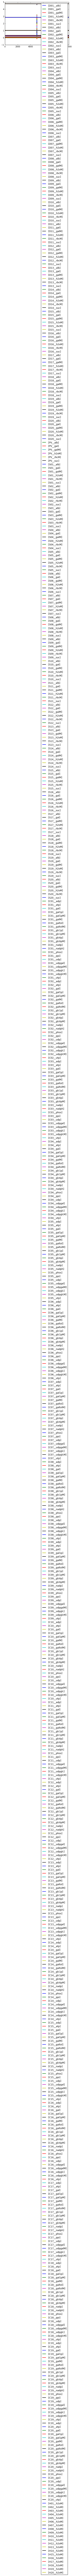

In [6]:
import multiscale.examples.testdata as testdata
reload(testdata)
print(testdata.galactose_tissue_sbml)
reload(rt)
# 31s, reload 2.7s (core), 
r = rt.load_model(testdata.galactose_tissue_sbml)
rt.set_integrator_settings(r)
s = rt.simulate(r, 0, 10000)
r.plot()